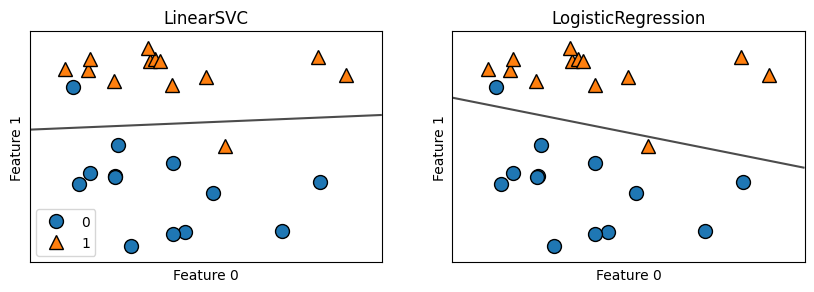

In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

import mglearn

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax, in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{clf.__class__.__name__}")
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

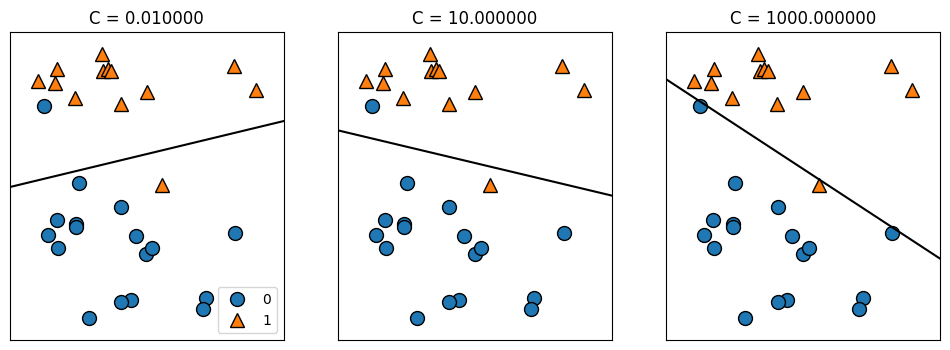

In [4]:
mglearn.plots.plot_linear_svc_regularization()

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [11]:
cancer = load_breast_cancer()

In [12]:
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [27]:
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], stratify=cancer["target"], test_size=0.25, random_state=42)
logreg = LogisticRegression(max_iter=2650).fit(X_train, y_train)
print(f"Train set score: {logreg.score(X_train, y_train)}")
print(f"Test set score: {logreg.score(X_test, y_test)}")


Train set score: 0.9577464788732394
Test set score: 0.958041958041958


In [32]:
logreg_100 = LogisticRegression(max_iter=10000, C=100).fit(X_train, y_train)
print(f"Train set score: {logreg_100.score(X_train, y_train)}")
print(f"Test set score: {logreg_100.score(X_test, y_test)}")

Train set score: 0.9812206572769953
Test set score: 0.965034965034965


In [35]:
logreg_001 = LogisticRegression(max_iter=500, C=0.01).fit(X_train, y_train)
print(f"Train set score: {logreg_001.score(X_test, y_test)}")
print(f"Test set score: {logreg_001.score(X_test, y_test)}")

Train set score: 0.951048951048951
Test set score: 0.951048951048951


(-5.0, 5.0)

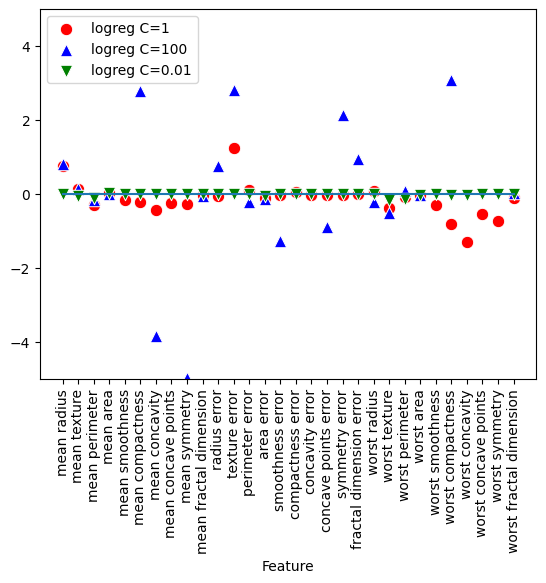

In [46]:
import seaborn as sns
import numpy as np

sns.scatterplot(x=list(range(len(logreg.coef_[0]))), y=logreg.coef_[0], label="logreg C=1", color="red", marker="o", s=80)
sns.scatterplot(x=list(range(len(logreg_100.coef_[0]))), y=logreg_100.coef_[0], label="logreg C=100", color="blue", marker="^", s=80)
sns.scatterplot(x=list(range(len(logreg_001.coef_[0]))), y=logreg_001.coef_[0], label="logreg C=0.01", color="green", marker="v", s=80)
sns.lineplot(x=np.arange(0, 30), y=0)
plt.xlabel("Feature")
plt.xticks(np.arange(0, 30), cancer["feature_names"], rotation=90)
plt.ylim(-5, 5)

Train set score of l1 logreg with C=0.001 : 
0.9131455399061033
Test set score of l1 logreg with C=0.001 : 
0.9230769230769231


Train set score of l1 logreg with C=1 : 
0.960093896713615
Test set score of l1 logreg with C=1 : 
0.958041958041958


Train set score of l1 logreg with C=100 : 
0.9859154929577465
Test set score of l1 logreg with C=100 : 
0.9790209790209791




<Axes: >

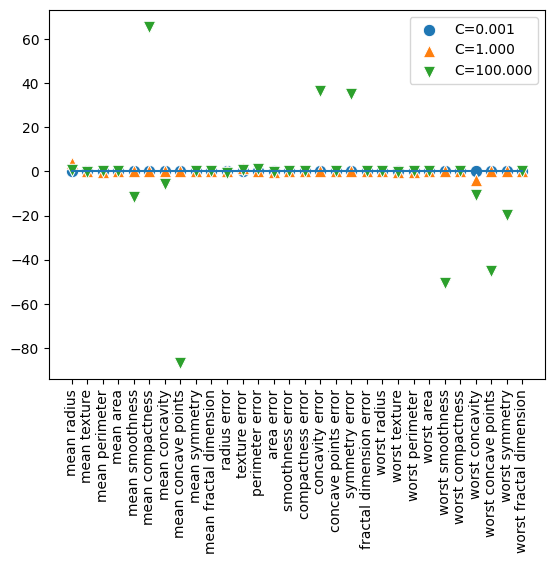

In [59]:
for C, marker in zip([0.001, 1, 100], ["o", "^", "v"]):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver="liblinear", max_iter=180).fit(X_train, y_train)
    print(f"Train set score of l1 logreg with C={C} : \n{lr_l1.score(X_train, y_train)}")
    print(f"Test set score of l1 logreg with C={C} : \n{lr_l1.score(X_test, y_test)}\n\n")
    # 1クラス分とっている
    sns.scatterplot(x=np.arange(len(lr_l1.coef_[0])), y=lr_l1.coef_[0], label=f"C={C:.3f}", marker=marker, s=80)

plt.xticks(np.arange(0, len(cancer["feature_names"])), labels=cancer["feature_names"], rotation=90)
sns.lineplot(x=np.arange(0, len(cancer["feature_names"])), y=0)